# 📊 Sales Prediction Using Python

---

**Author:** Piyush Ramteke
**Organization:** CodSoft  
**Task:** Sales Prediction Using Python (Task 2)  
**Date:** February 2026

---

## 🎯 Objective

Sales prediction involves forecasting the amount of a product that customers will purchase, taking into account various factors such as **advertising expenditure**, **target audience segmentation**, and **advertising platform selection**.

In this project, we will:
1. **Explore** the Advertising dataset to understand relationships between ad spending and sales
2. **Visualize** key patterns and correlations in the data
3. **Build** multiple regression models to predict sales based on advertising budgets
4. **Evaluate** and compare model performance
5. **Derive** actionable business insights for optimizing advertising strategies

## 📦 Dataset Overview

The dataset contains **200 records** of advertising budgets across three media channels and resulting sales:

| Feature | Description |
|---------|-------------|
| `TV` | Advertising budget spent on TV (in thousands of dollars) |
| `Radio` | Advertising budget spent on Radio (in thousands of dollars) |
| `Newspaper` | Advertising budget spent on Newspaper (in thousands of dollars) |
| `Sales` | Product sales (in thousands of units) — **Target Variable** |

---
## 1️⃣ Importing Libraries

In [1]:
# Core Libraries
import numpy as np
import pandas as pd

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing & Model Selection
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler

# Regression Models
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR

# Evaluation Metrics
from sklearn.metrics import (
    mean_absolute_error,
    mean_squared_error,
    r2_score
)

# Warnings
import warnings
warnings.filterwarnings('ignore')

# Plot Style
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 12
plt.rcParams['axes.titlesize'] = 14
plt.rcParams['axes.labelsize'] = 12

print('✅ All libraries imported successfully!')

✅ All libraries imported successfully!


---
## 2️⃣ Loading the Dataset

In [2]:
# Load the dataset
df = pd.read_csv('Advertising.csv')

print(f'📐 Dataset Shape: {df.shape[0]} rows × {df.shape[1]} columns')
print(f'📋 Columns: {list(df.columns)}')
print()
df.head(10)

📐 Dataset Shape: 200 rows × 4 columns
📋 Columns: ['TV', 'Radio', 'Newspaper', 'Sales']



,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
5,8.7,48.9,75.0,7.2
6,57.5,32.8,23.5,11.8
7,120.2,19.6,11.6,13.2
8,8.6,2.1,1.0,4.8
9,199.8,2.6,21.2,15.6


---
## 3️⃣ Exploratory Data Analysis (EDA)

### 3.1 Data Information & Statistics

In [3]:
# Data types and non-null counts
print('=' * 50)
print('📋 DATA INFO')
print('=' * 50)
df.info()

print()
print('=' * 50)
print('🔍 MISSING VALUES')
print('=' * 50)
missing = df.isnull().sum()
print(missing)
print(f'\n✅ Total missing values: {missing.sum()}')

📋 DATA INFO
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB

🔍 MISSING VALUES
TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

✅ Total missing values: 0


In [4]:
# Descriptive Statistics
print('=' * 50)
print('📊 DESCRIPTIVE STATISTICS')
print('=' * 50)
df.describe().round(2)

📊 DESCRIPTIVE STATISTICS


,TV,Radio,Newspaper,Sales
count,200.00,200.00,200.00,200.00
mean,147.04,23.26,30.55,15.13
std,85.85,14.85,21.78,5.28
min,0.70,0.00,0.30,1.60
25%,74.38,9.98,12.75,11.00
50%,149.75,22.90,25.75,16.00
75%,218.82,36.52,45.10,19.05
max,296.40,49.60,114.00,27.00


In [5]:
# Check for duplicates
duplicates = df.duplicated().sum()
print(f'🔁 Number of duplicate rows: {duplicates}')

if duplicates > 0:
    df = df.drop_duplicates()
    print(f'✅ Duplicates removed. New shape: {df.shape}')
else:
    print('✅ No duplicate rows found!')

🔁 Number of duplicate rows: 0
✅ No duplicate rows found!


### 3.2 Distribution of Features

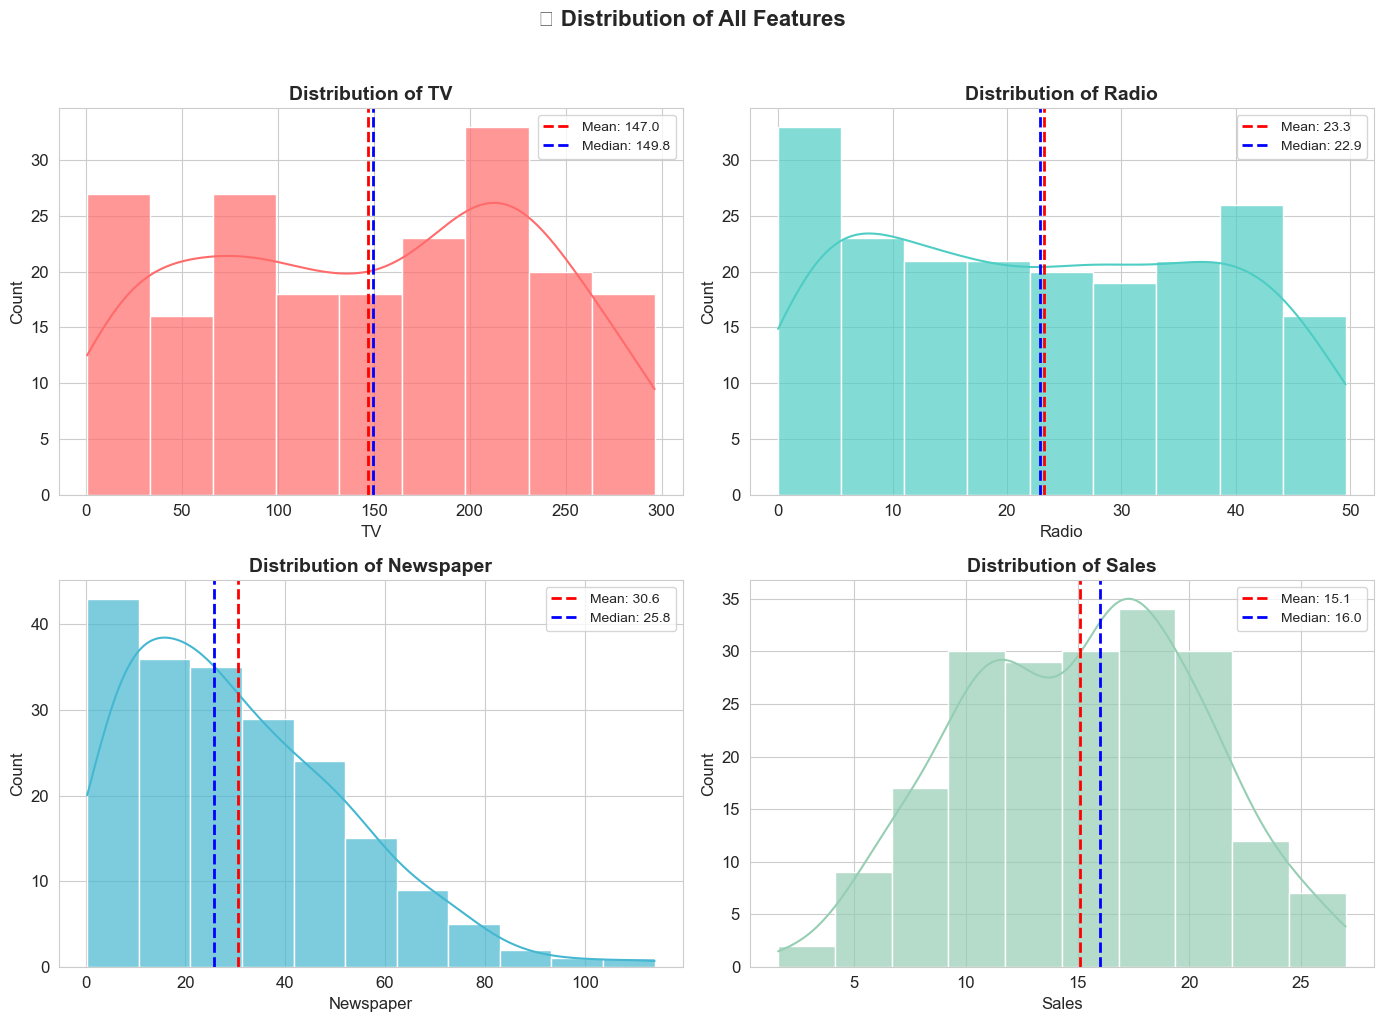

In [6]:
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

colors = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4']
columns = ['TV', 'Radio', 'Newspaper', 'Sales']

for i, (col, color) in enumerate(zip(columns, colors)):
    ax = axes[i // 2, i % 2]
    sns.histplot(df[col], kde=True, color=color, ax=ax, edgecolor='white', alpha=0.7)
    ax.axvline(df[col].mean(), color='red', linestyle='--', linewidth=2, label=f'Mean: {df[col].mean():.1f}')
    ax.axvline(df[col].median(), color='blue', linestyle='--', linewidth=2, label=f'Median: {df[col].median():.1f}')
    ax.set_title(f'Distribution of {col}', fontweight='bold', fontsize=14)
    ax.legend(fontsize=10)

plt.suptitle('📊 Distribution of All Features', fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

### 3.3 Boxplots — Detecting Outliers

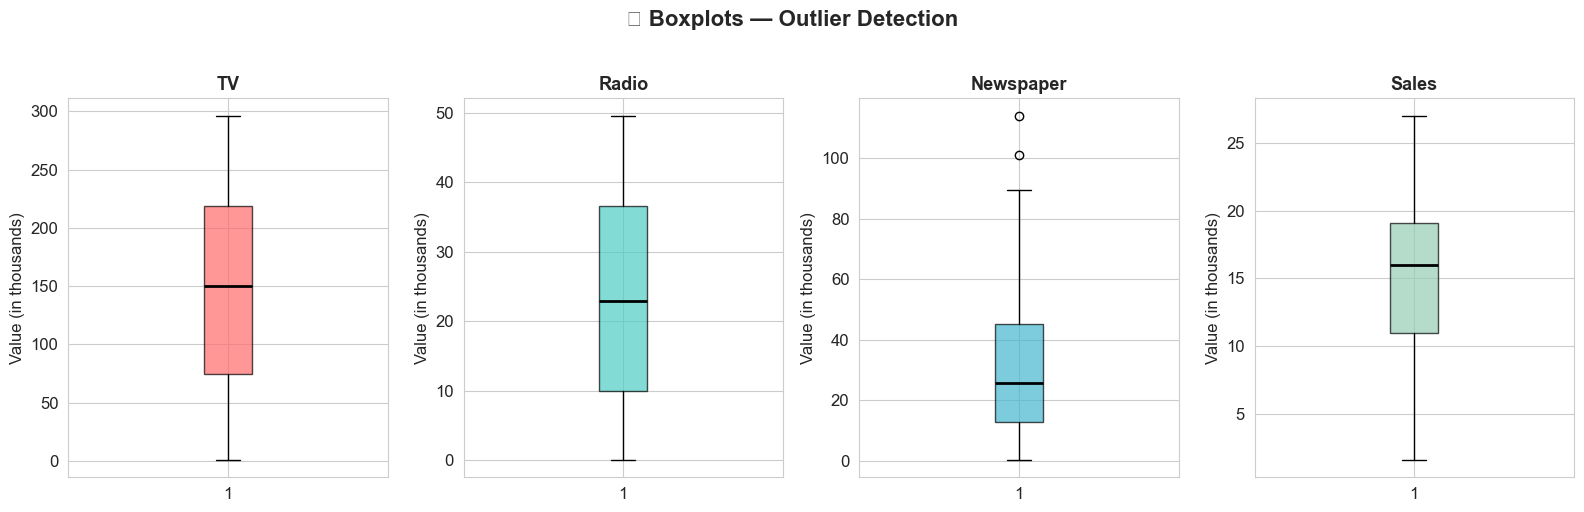


🔍 Outlier Detection (IQR Method):
----------------------------------------
  TV          : 0 outlier(s)
  Radio       : 0 outlier(s)
  Newspaper   : 2 outlier(s)
  Sales       : 0 outlier(s)


In [7]:
fig, axes = plt.subplots(1, 4, figsize=(16, 5))

for i, (col, color) in enumerate(zip(columns, colors)):
    bp = axes[i].boxplot(df[col], patch_artist=True, 
                         boxprops=dict(facecolor=color, alpha=0.7),
                         medianprops=dict(color='black', linewidth=2))
    axes[i].set_title(f'{col}', fontweight='bold', fontsize=13)
    axes[i].set_ylabel('Value (in thousands)')

plt.suptitle('📦 Boxplots — Outlier Detection', fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

# Quantify outliers using IQR method
print('\n🔍 Outlier Detection (IQR Method):')
print('-' * 40)
for col in columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower) | (df[col] > upper)].shape[0]
    print(f'  {col:12s}: {outliers} outlier(s)')

### 3.4 Correlation Analysis

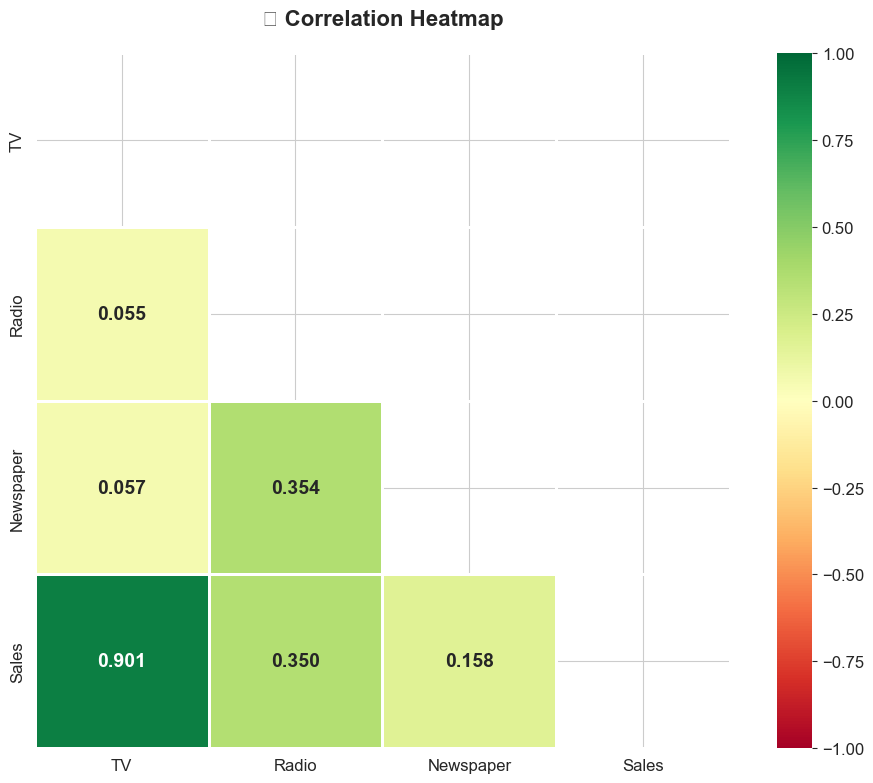


📊 Correlation with Sales:
-----------------------------------
  TV          : 0.9012 (Strong)
  Radio       : 0.3496 (Weak)
  Newspaper   : 0.1580 (Weak)


In [8]:
# Correlation Matrix
corr_matrix = df.corr()

plt.figure(figsize=(10, 8))
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
sns.heatmap(corr_matrix, annot=True, fmt='.3f', cmap='RdYlGn', 
            mask=mask, linewidths=2, linecolor='white',
            vmin=-1, vmax=1, center=0,
            annot_kws={'size': 14, 'weight': 'bold'},
            square=True)
plt.title('🔗 Correlation Heatmap', fontsize=16, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

print('\n📊 Correlation with Sales:')
print('-' * 35)
for col in ['TV', 'Radio', 'Newspaper']:
    corr = df[col].corr(df['Sales'])
    strength = 'Strong' if abs(corr) > 0.7 else ('Moderate' if abs(corr) > 0.4 else 'Weak')
    print(f'  {col:12s}: {corr:.4f} ({strength})')

### 3.5 Pairplot — Relationships Between Features

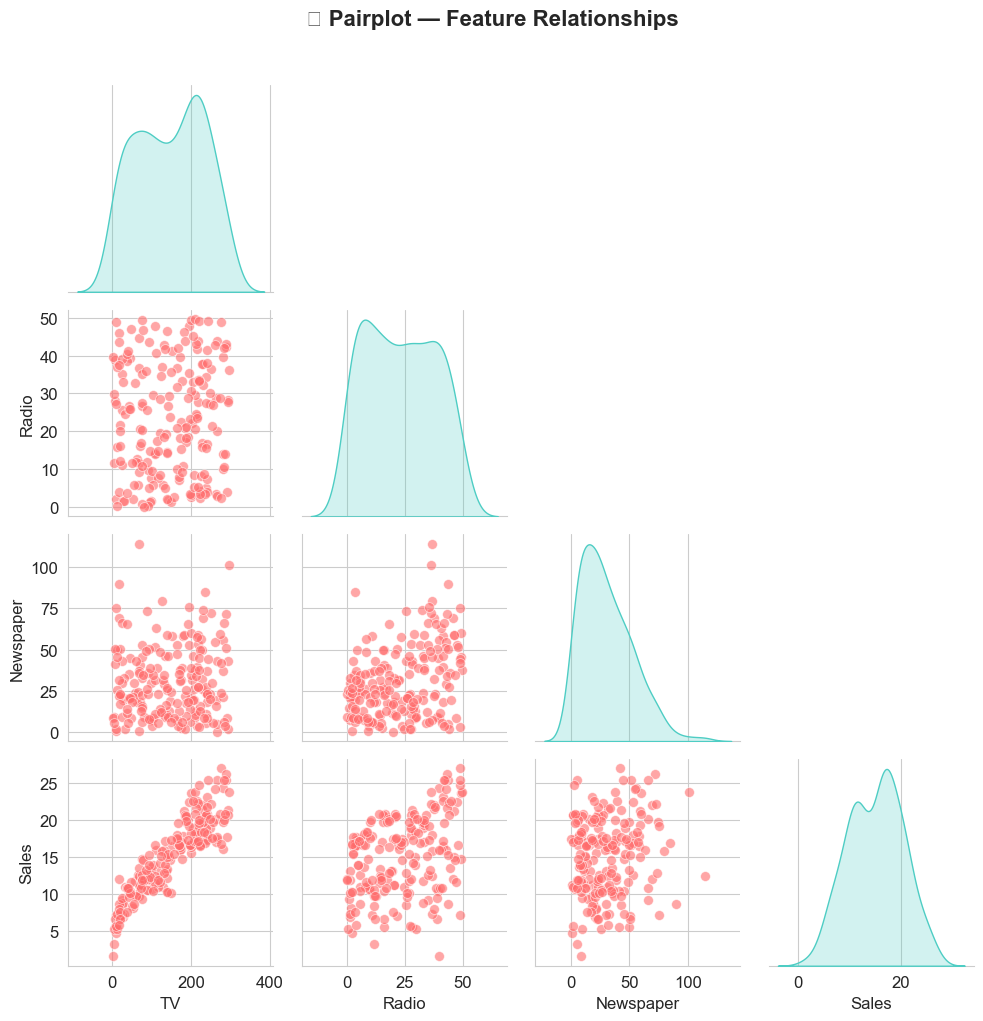

In [9]:
sns.pairplot(df, diag_kind='kde', corner=True,
             plot_kws={'alpha': 0.6, 'color': '#FF6B6B', 'edgecolor': 'white', 's': 50},
             diag_kws={'color': '#4ECDC4', 'fill': True})
plt.suptitle('🔍 Pairplot — Feature Relationships', fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

### 3.6 Advertising Spend vs Sales — Individual Relationships

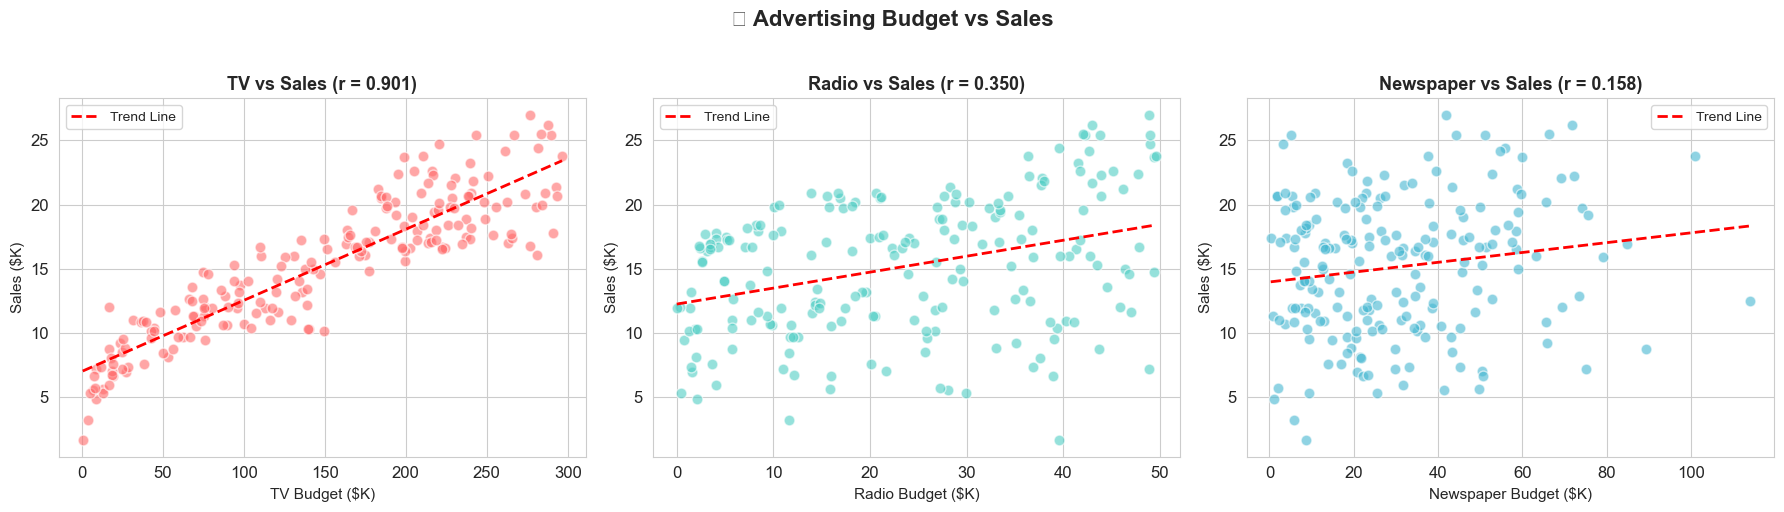

In [10]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

ad_channels = ['TV', 'Radio', 'Newspaper']
colors_scatter = ['#FF6B6B', '#4ECDC4', '#45B7D1']

for i, (channel, color) in enumerate(zip(ad_channels, colors_scatter)):
    axes[i].scatter(df[channel], df['Sales'], color=color, alpha=0.6, edgecolor='white', s=60)
    
    # Add trendline
    z = np.polyfit(df[channel], df['Sales'], 1)
    p = np.poly1d(z)
    x_line = np.linspace(df[channel].min(), df[channel].max(), 100)
    axes[i].plot(x_line, p(x_line), color='red', linewidth=2, linestyle='--', label='Trend Line')
    
    corr = df[channel].corr(df['Sales'])
    axes[i].set_title(f'{channel} vs Sales (r = {corr:.3f})', fontweight='bold', fontsize=13)
    axes[i].set_xlabel(f'{channel} Budget ($K)', fontsize=11)
    axes[i].set_ylabel('Sales ($K)', fontsize=11)
    axes[i].legend(fontsize=10)

plt.suptitle('📈 Advertising Budget vs Sales', fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

### 3.7 Advertising Budget Proportions

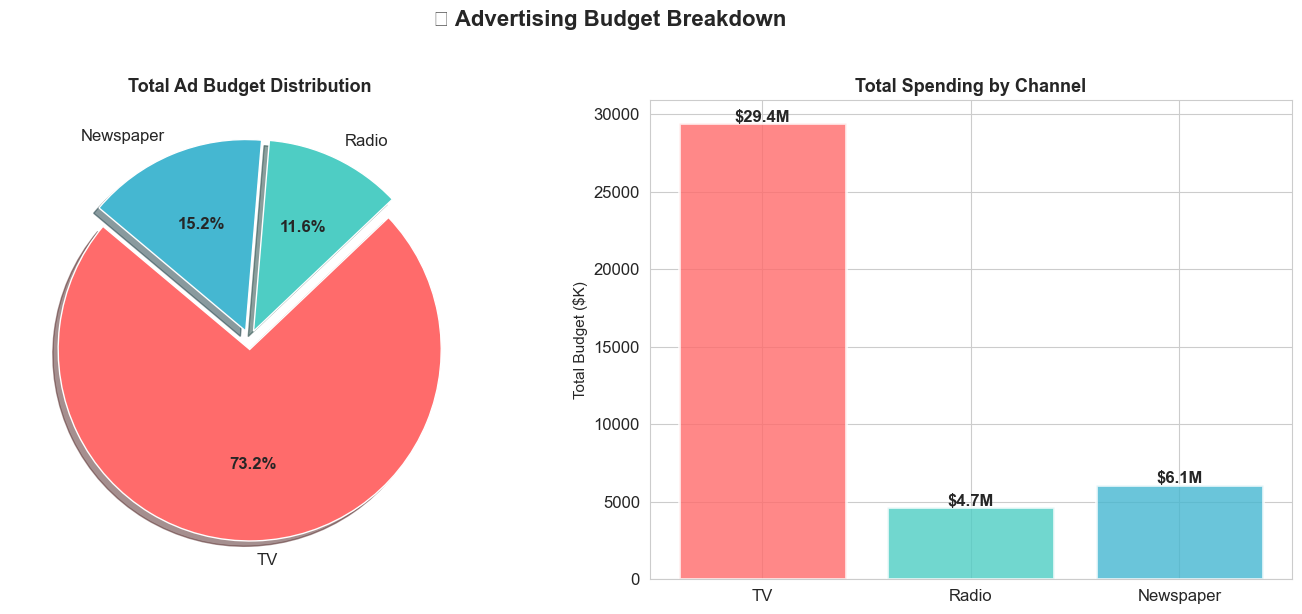

In [11]:
# Total spending per channel
total_spending = df[['TV', 'Radio', 'Newspaper']].sum()

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Pie chart
explode = (0.05, 0.05, 0.05)
colors_pie = ['#FF6B6B', '#4ECDC4', '#45B7D1']
wedges, texts, autotexts = axes[0].pie(total_spending, labels=total_spending.index, 
                                        autopct='%1.1f%%', colors=colors_pie,
                                        explode=explode, shadow=True, startangle=140,
                                        textprops={'fontsize': 12})
for autotext in autotexts:
    autotext.set_fontweight('bold')
axes[0].set_title('Total Ad Budget Distribution', fontweight='bold', fontsize=13)

# Bar chart
bars = axes[1].bar(total_spending.index, total_spending.values, color=colors_pie, 
                   edgecolor='white', linewidth=2, alpha=0.8)
for bar, val in zip(bars, total_spending.values):
    axes[1].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 100,
                f'${val/1000:.1f}M', ha='center', fontweight='bold', fontsize=12)
axes[1].set_title('Total Spending by Channel', fontweight='bold', fontsize=13)
axes[1].set_ylabel('Total Budget ($K)', fontsize=11)

plt.suptitle('💰 Advertising Budget Breakdown', fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

---
## 4️⃣ Feature Engineering

In [12]:
# Create new interaction & derived features
df['TV_Radio'] = df['TV'] * df['Radio']               # Interaction: TV × Radio
df['TV_Newspaper'] = df['TV'] * df['Newspaper']        # Interaction: TV × Newspaper
df['Radio_Newspaper'] = df['Radio'] * df['Newspaper']  # Interaction: Radio × Newspaper
df['Total_Ad_Spend'] = df['TV'] + df['Radio'] + df['Newspaper']  # Total budget
df['TV_Share'] = df['TV'] / df['Total_Ad_Spend']       # TV's share of total budget
df['Radio_Share'] = df['Radio'] / df['Total_Ad_Spend'] # Radio's share of total budget

print('✅ New features created!')
print(f'📐 New shape: {df.shape}')
print(f'📋 Columns: {list(df.columns)}')

# Correlation of new features with Sales
print('\n📊 New Feature Correlations with Sales:')
print('-' * 45)
new_features = ['TV_Radio', 'TV_Newspaper', 'Radio_Newspaper', 'Total_Ad_Spend', 'TV_Share', 'Radio_Share']
for feat in new_features:
    corr = df[feat].corr(df['Sales'])
    print(f'  {feat:20s}: {corr:.4f}')

✅ New features created!
📐 New shape: (200, 10)
📋 Columns: ['TV', 'Radio', 'Newspaper', 'Sales', 'TV_Radio', 'TV_Newspaper', 'Radio_Newspaper', 'Total_Ad_Spend', 'TV_Share', 'Radio_Share']

📊 New Feature Correlations with Sales:
---------------------------------------------
  TV_Radio            : 0.8316
  TV_Newspaper        : 0.6209
  Radio_Newspaper     : 0.2624
  Total_Ad_Spend      : 0.9249
  TV_Share            : 0.6146
  Radio_Share         : -0.4299


---
## 5️⃣ Data Preparation for Modeling

In [13]:
# Define features and target
feature_cols = ['TV', 'Radio', 'Newspaper', 'TV_Radio', 'Total_Ad_Spend', 'TV_Share']
X = df[feature_cols]
y = df['Sales']

print(f'📋 Selected Features: {feature_cols}')
print(f'🎯 Target Variable: Sales')
print(f'📐 X shape: {X.shape}  |  y shape: {y.shape}')

# Train-Test Split (80/20)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print(f'\n🔀 Train-Test Split (80/20):')
print(f'  Training set: {X_train.shape[0]} samples')
print(f'  Testing set:  {X_test.shape[0]} samples')

# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print('\n✅ Features scaled using StandardScaler')

📋 Selected Features: ['TV', 'Radio', 'Newspaper', 'TV_Radio', 'Total_Ad_Spend', 'TV_Share']
🎯 Target Variable: Sales
📐 X shape: (200, 6)  |  y shape: (200,)

🔀 Train-Test Split (80/20):
  Training set: 160 samples
  Testing set:  40 samples

✅ Features scaled using StandardScaler


---
## 6️⃣ Model Building & Training

We will train and compare **6 different regression models**:

| # | Model | Type |
|---|-------|------|
| 1 | Linear Regression | Baseline |
| 2 | Ridge Regression | Regularized (L2) |
| 3 | Lasso Regression | Regularized (L1) |
| 4 | Random Forest | Ensemble (Bagging) |
| 5 | Gradient Boosting | Ensemble (Boosting) |
| 6 | Support Vector Regression | Kernel-based |

In [14]:
# Define models
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(alpha=1.0),
    'Lasso Regression': Lasso(alpha=0.1),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42, max_depth=10),
    'Gradient Boosting': GradientBoostingRegressor(n_estimators=100, random_state=42, learning_rate=0.1),
    'SVR': SVR(kernel='rbf', C=10, gamma='scale')
}

# Train all models and collect results
results = {}
predictions = {}

print('🚀 Training Models...')
print('=' * 80)

for name, model in models.items():
    # Use scaled data for SVR, Ridge, Lasso; original for tree-based & linear
    if name in ['SVR', 'Ridge Regression', 'Lasso Regression']:
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
        cv_scores = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='r2')
    else:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='r2')
    
    # Calculate metrics
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    cv_mean = cv_scores.mean()
    cv_std = cv_scores.std()
    
    results[name] = {
        'MAE': mae, 'MSE': mse, 'RMSE': rmse, 
        'R² Score': r2, 'CV Mean R²': cv_mean, 'CV Std': cv_std
    }
    predictions[name] = y_pred
    
    print(f'\n📌 {name}')
    print(f'   MAE:  {mae:.4f}  |  RMSE: {rmse:.4f}  |  R²: {r2:.4f}  |  CV R²: {cv_mean:.4f} ± {cv_std:.4f}')

print('\n' + '=' * 80)
print('✅ All models trained successfully!')

🚀 Training Models...

📌 Linear Regression
   MAE:  0.9464  |  RMSE: 1.3006  |  R²: 0.9453  |  CV R²: 0.9195 ± 0.0242

📌 Ridge Regression
   MAE:  0.9468  |  RMSE: 1.3013  |  R²: 0.9452  |  CV R²: 0.9195 ± 0.0242

📌 Lasso Regression
   MAE:  1.0302  |  RMSE: 1.3571  |  R²: 0.9404  |  CV R²: 0.9178 ± 0.0245

📌 Random Forest
   MAE:  0.8454  |  RMSE: 1.2230  |  R²: 0.9516  |  CV R²: 0.9442 ± 0.0185

📌 Gradient Boosting
   MAE:  0.7987  |  RMSE: 1.1558  |  R²: 0.9568  |  CV R²: 0.9428 ± 0.0137

📌 SVR
   MAE:  0.7552  |  RMSE: 1.0722  |  R²: 0.9628  |  CV R²: 0.8985 ± 0.0290

✅ All models trained successfully!


---
## 7️⃣ Model Evaluation & Comparison

In [15]:
# Results DataFrame
results_df = pd.DataFrame(results).T
results_df = results_df.sort_values('R² Score', ascending=False)

print('📊 MODEL COMPARISON (Sorted by R² Score)')
print('=' * 85)
results_df.round(4)

📊 MODEL COMPARISON (Sorted by R² Score)


,MAE,MSE,RMSE,R² Score,CV Mean R²,CV Std
SVR,0.7552,1.1496,1.0722,0.9628,0.8985,0.0290
Gradient Boosting,0.7987,1.3358,1.1558,0.9568,0.9428,0.0137
Random Forest,0.8454,1.4956,1.2230,0.9516,0.9442,0.0185
Linear Regression,0.9464,1.6915,1.3006,0.9453,0.9195,0.0242
Ridge Regression,0.9468,1.6934,1.3013,0.9452,0.9195,0.0242
Lasso Regression,1.0302,1.8417,1.3571,0.9404,0.9178,0.0245


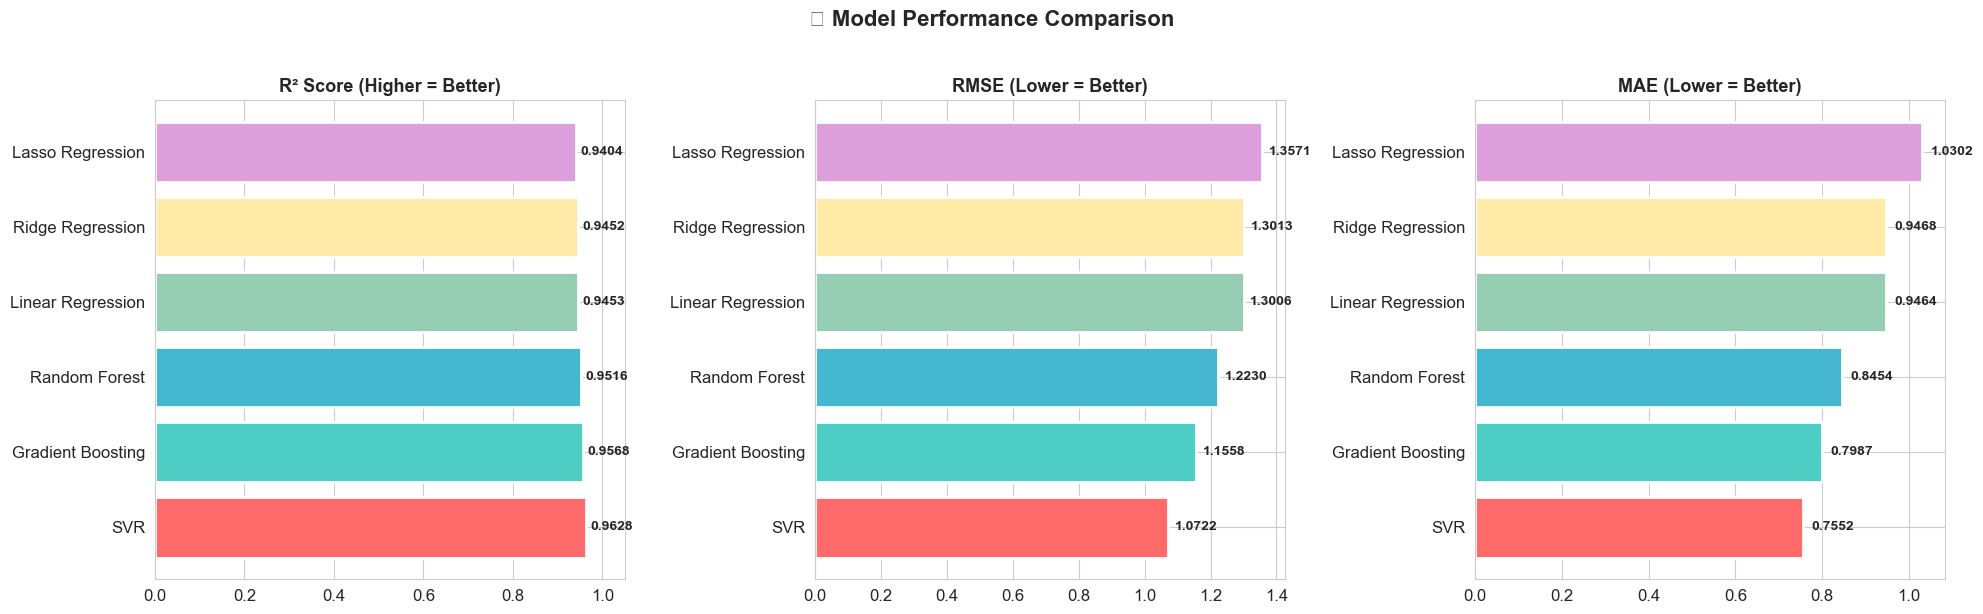

In [16]:
# Visual Comparison of Models
fig, axes = plt.subplots(1, 3, figsize=(20, 6))

model_names = results_df.index
colors_bar = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4', '#FFEAA7', '#DDA0DD']

# R² Score Comparison
bars1 = axes[0].barh(model_names, results_df['R² Score'], color=colors_bar[:len(model_names)], 
                     edgecolor='white', linewidth=2)
axes[0].set_title('R² Score (Higher = Better)', fontweight='bold', fontsize=13)
axes[0].set_xlim(0, 1.05)
for bar, val in zip(bars1, results_df['R² Score']):
    axes[0].text(val + 0.01, bar.get_y() + bar.get_height()/2, f'{val:.4f}', 
                va='center', fontweight='bold', fontsize=10)

# RMSE Comparison
bars2 = axes[1].barh(model_names, results_df['RMSE'], color=colors_bar[:len(model_names)], 
                     edgecolor='white', linewidth=2)
axes[1].set_title('RMSE (Lower = Better)', fontweight='bold', fontsize=13)
for bar, val in zip(bars2, results_df['RMSE']):
    axes[1].text(val + 0.02, bar.get_y() + bar.get_height()/2, f'{val:.4f}', 
                va='center', fontweight='bold', fontsize=10)

# MAE Comparison
bars3 = axes[2].barh(model_names, results_df['MAE'], color=colors_bar[:len(model_names)], 
                     edgecolor='white', linewidth=2)
axes[2].set_title('MAE (Lower = Better)', fontweight='bold', fontsize=13)
for bar, val in zip(bars3, results_df['MAE']):
    axes[2].text(val + 0.02, bar.get_y() + bar.get_height()/2, f'{val:.4f}', 
                va='center', fontweight='bold', fontsize=10)

plt.suptitle('🏆 Model Performance Comparison', fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

### 7.1 Actual vs Predicted — Top Models

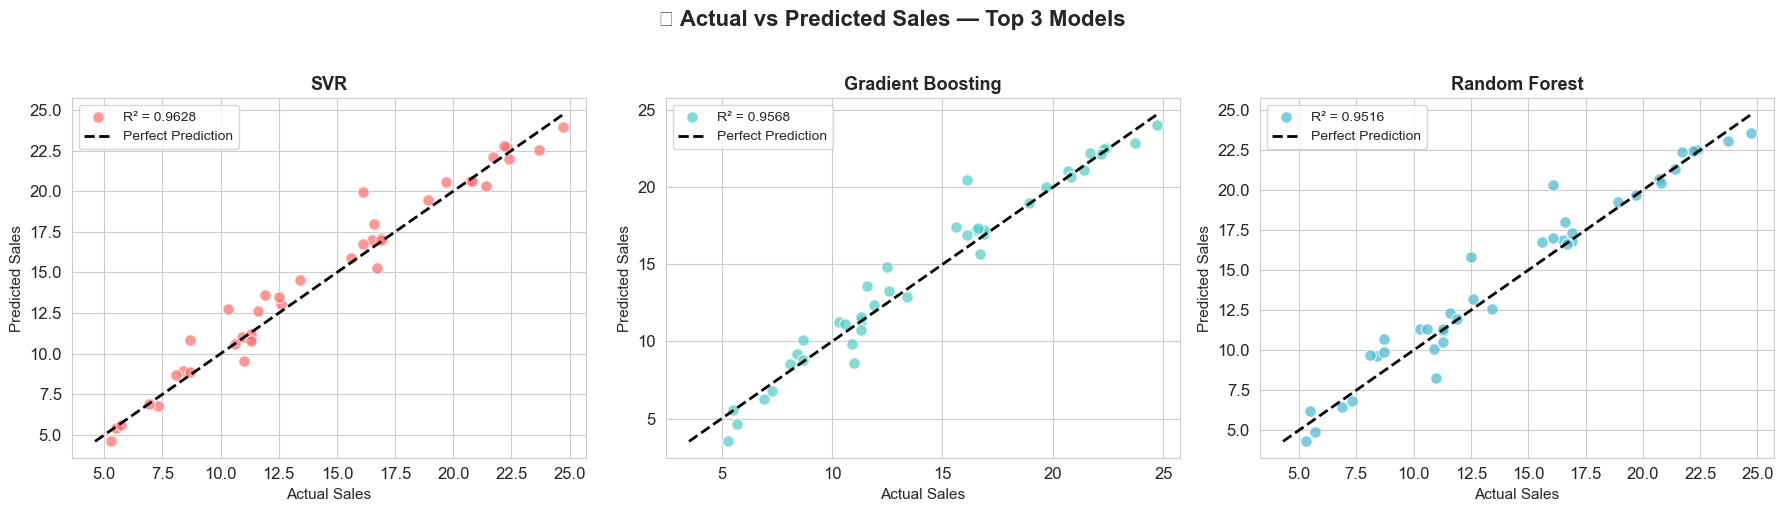

In [17]:
# Get top 3 models
top_models = results_df.head(3).index.tolist()

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for i, model_name in enumerate(top_models):
    y_pred = predictions[model_name]
    r2 = results[model_name]['R² Score']
    
    axes[i].scatter(y_test, y_pred, color=colors_scatter[i], alpha=0.7, 
                   edgecolor='white', s=70, label=f'R² = {r2:.4f}')
    
    # Perfect prediction line
    min_val = min(y_test.min(), y_pred.min())
    max_val = max(y_test.max(), y_pred.max())
    axes[i].plot([min_val, max_val], [min_val, max_val], 'k--', linewidth=2, label='Perfect Prediction')
    
    axes[i].set_title(f'{model_name}', fontweight='bold', fontsize=13)
    axes[i].set_xlabel('Actual Sales', fontsize=11)
    axes[i].set_ylabel('Predicted Sales', fontsize=11)
    axes[i].legend(fontsize=10)

plt.suptitle('🎯 Actual vs Predicted Sales — Top 3 Models', fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

### 7.2 Residual Analysis — Best Model

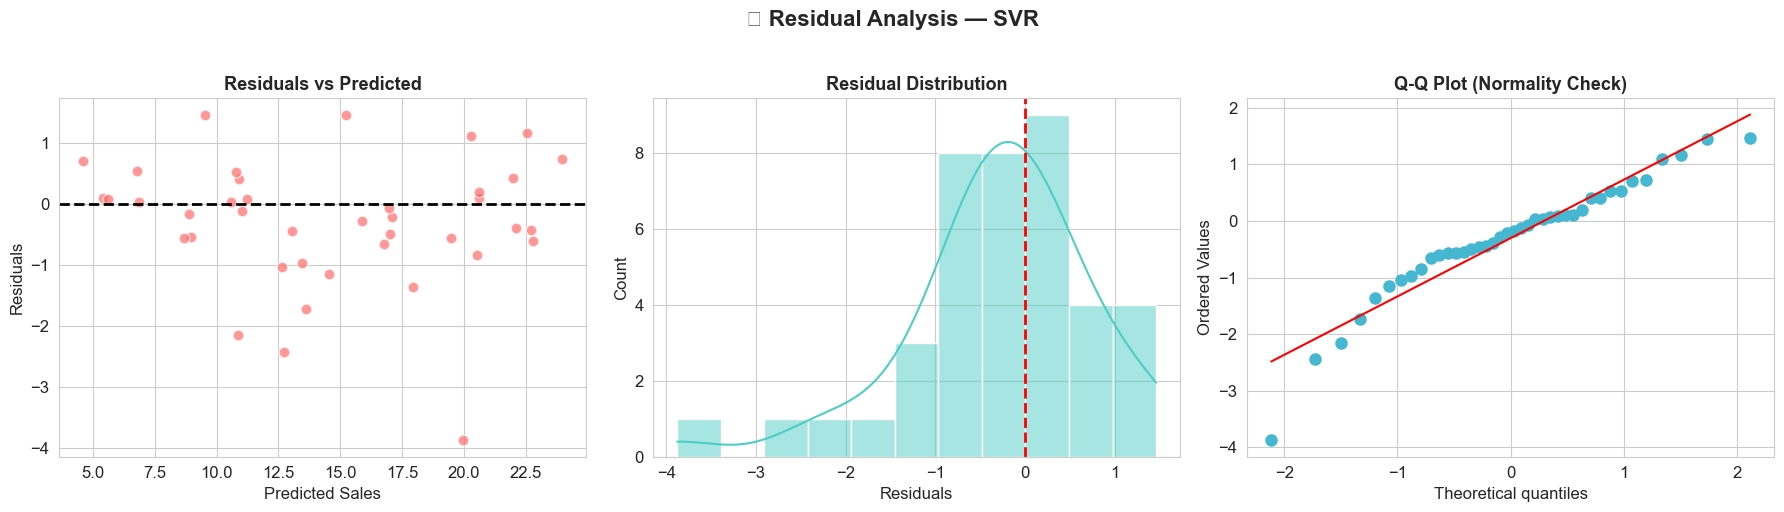


📊 Residual Statistics (SVR):
  Mean:     -0.3027
  Std Dev:  1.0286
  Min:      -3.8769
  Max:      1.4568


In [18]:
# Best model residuals
best_model_name = results_df.index[0]
best_pred = predictions[best_model_name]
residuals = y_test.values - best_pred

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Residuals vs Predicted
axes[0].scatter(best_pred, residuals, color='#FF6B6B', alpha=0.7, edgecolor='white', s=60)
axes[0].axhline(y=0, color='black', linestyle='--', linewidth=2)
axes[0].set_title('Residuals vs Predicted', fontweight='bold', fontsize=13)
axes[0].set_xlabel('Predicted Sales')
axes[0].set_ylabel('Residuals')

# Residual Distribution
sns.histplot(residuals, kde=True, color='#4ECDC4', ax=axes[1], edgecolor='white')
axes[1].axvline(x=0, color='red', linestyle='--', linewidth=2)
axes[1].set_title('Residual Distribution', fontweight='bold', fontsize=13)
axes[1].set_xlabel('Residuals')

# Q-Q Plot
from scipy import stats
stats.probplot(residuals, dist='norm', plot=axes[2])
axes[2].set_title('Q-Q Plot (Normality Check)', fontweight='bold', fontsize=13)
axes[2].get_lines()[0].set_color('#45B7D1')
axes[2].get_lines()[0].set_markersize(8)
axes[2].get_lines()[1].set_color('red')

plt.suptitle(f'📉 Residual Analysis — {best_model_name}', fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

print(f'\n📊 Residual Statistics ({best_model_name}):')
print(f'  Mean:     {residuals.mean():.4f}')
print(f'  Std Dev:  {residuals.std():.4f}')
print(f'  Min:      {residuals.min():.4f}')
print(f'  Max:      {residuals.max():.4f}')

### 7.3 Feature Importance Analysis

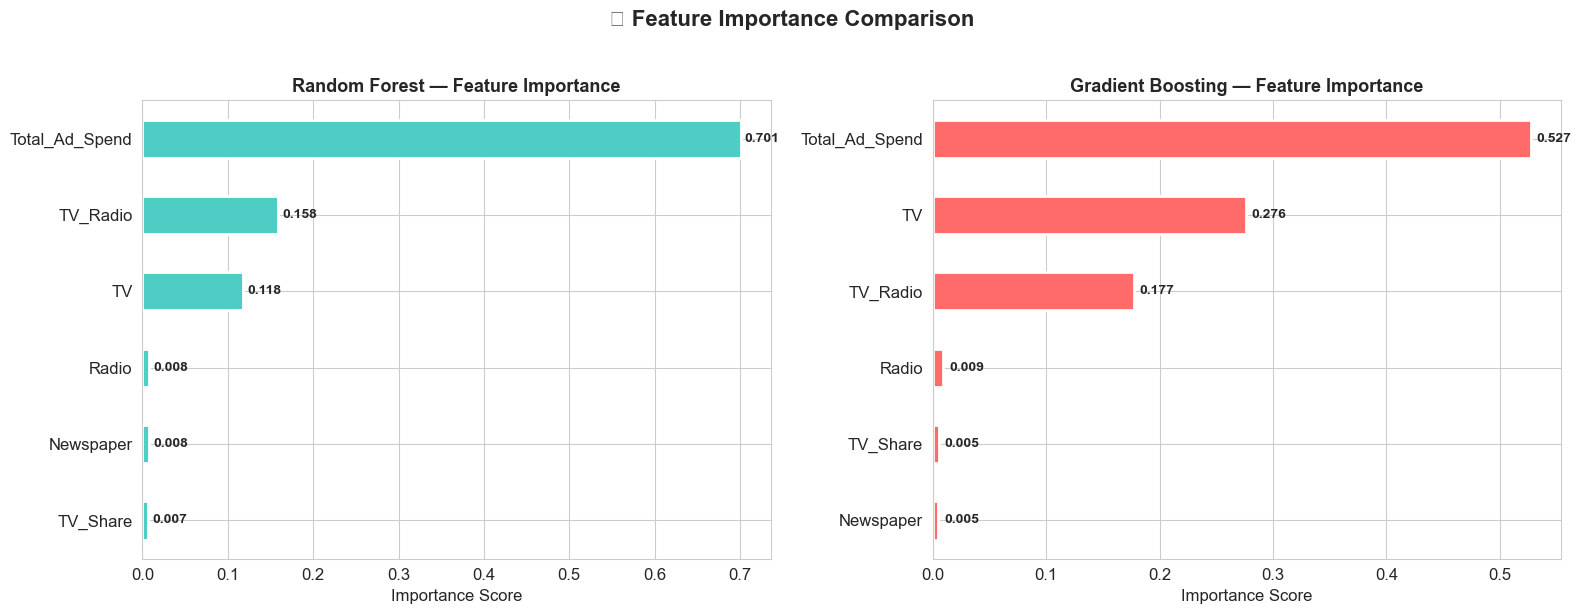


📊 Linear Regression Coefficients:
---------------------------------------------
       Feature  Coefficient
      TV_Share     8.382433
         Radio     0.056475
Total_Ad_Spend     0.039960
      TV_Radio     0.000275
            TV    -0.008210
     Newspaper    -0.008304

Intercept: 0.6786


In [19]:
# Feature importance from tree-based models
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Random Forest Feature Importance
rf_model = models['Random Forest']
rf_importance = pd.Series(rf_model.feature_importances_, index=feature_cols).sort_values(ascending=True)

rf_importance.plot(kind='barh', ax=axes[0], color='#4ECDC4', edgecolor='white', linewidth=2)
axes[0].set_title('Random Forest — Feature Importance', fontweight='bold', fontsize=13)
axes[0].set_xlabel('Importance Score')
for i, (val, name) in enumerate(zip(rf_importance.values, rf_importance.index)):
    axes[0].text(val + 0.005, i, f'{val:.3f}', va='center', fontweight='bold', fontsize=10)

# Gradient Boosting Feature Importance
gb_model = models['Gradient Boosting']
gb_importance = pd.Series(gb_model.feature_importances_, index=feature_cols).sort_values(ascending=True)

gb_importance.plot(kind='barh', ax=axes[1], color='#FF6B6B', edgecolor='white', linewidth=2)
axes[1].set_title('Gradient Boosting — Feature Importance', fontweight='bold', fontsize=13)
axes[1].set_xlabel('Importance Score')
for i, (val, name) in enumerate(zip(gb_importance.values, gb_importance.index)):
    axes[1].text(val + 0.005, i, f'{val:.3f}', va='center', fontweight='bold', fontsize=10)

plt.suptitle('🌟 Feature Importance Comparison', fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

# Linear Regression Coefficients
print('\n📊 Linear Regression Coefficients:')
print('-' * 45)
lr_model = models['Linear Regression']
coeff_df = pd.DataFrame({
    'Feature': feature_cols,
    'Coefficient': lr_model.coef_
}).sort_values('Coefficient', ascending=False)
print(coeff_df.to_string(index=False))
print(f'\nIntercept: {lr_model.intercept_:.4f}')

### 7.4 Cross-Validation Score Comparison

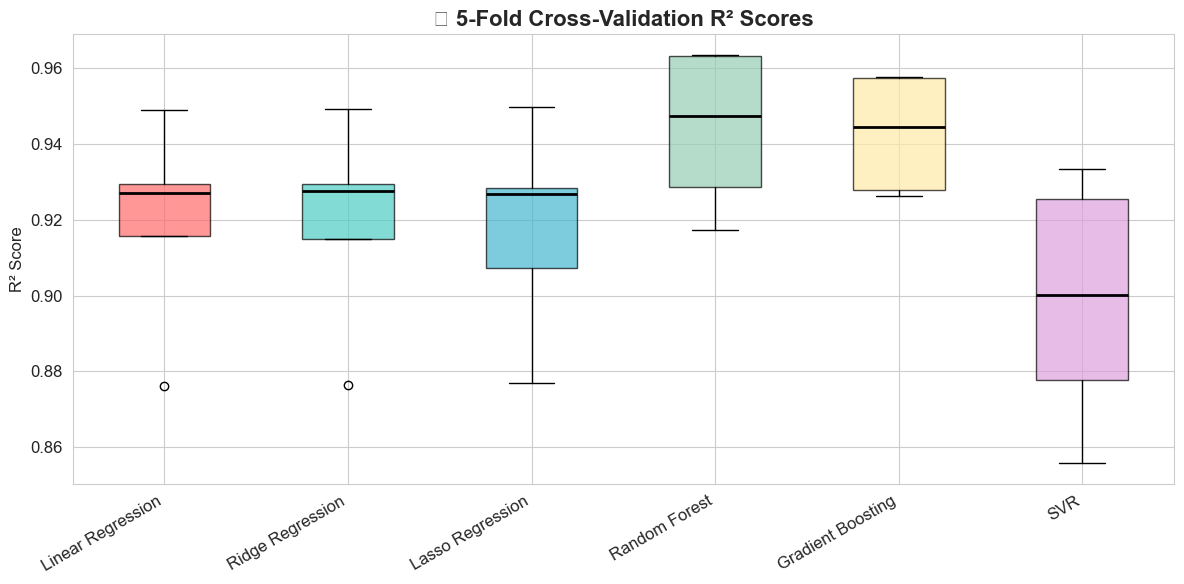

In [20]:
# Cross-validation boxplot
cv_results = {}
for name, model in models.items():
    if name in ['SVR', 'Ridge Regression', 'Lasso Regression']:
        scores = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='r2')
    else:
        scores = cross_val_score(model, X_train, y_train, cv=5, scoring='r2')
    cv_results[name] = scores

plt.figure(figsize=(12, 6))
bp = plt.boxplot(cv_results.values(), labels=cv_results.keys(), patch_artist=True,
                 medianprops=dict(color='black', linewidth=2))

for patch, color in zip(bp['boxes'], colors_bar[:len(cv_results)]):
    patch.set_facecolor(color)
    patch.set_alpha(0.7)

plt.xticks(rotation=30, ha='right')
plt.ylabel('R² Score', fontsize=12)
plt.title('📊 5-Fold Cross-Validation R² Scores', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

---
## 8️⃣ Predicting Sales on New Data

In [21]:
# Simulate new advertising campaigns
new_campaigns = pd.DataFrame({
    'TV': [150, 200, 50, 300, 100],
    'Radio': [30, 45, 10, 50, 25],
    'Newspaper': [20, 60, 40, 30, 15]
})

# Create the same engineered features
new_campaigns['TV_Radio'] = new_campaigns['TV'] * new_campaigns['Radio']
new_campaigns['Total_Ad_Spend'] = new_campaigns['TV'] + new_campaigns['Radio'] + new_campaigns['Newspaper']
new_campaigns['TV_Share'] = new_campaigns['TV'] / new_campaigns['Total_Ad_Spend']

# Select features in the same order
new_X = new_campaigns[feature_cols]

# Predict with the best model
best_model = models[best_model_name]
if best_model_name in ['SVR', 'Ridge Regression', 'Lasso Regression']:
    new_X_scaled = scaler.transform(new_X)
    new_predictions = best_model.predict(new_X_scaled)
else:
    new_predictions = best_model.predict(new_X)

# Display predictions
campaign_results = new_campaigns[['TV', 'Radio', 'Newspaper', 'Total_Ad_Spend']].copy()
campaign_results['Predicted Sales ($K)'] = np.round(new_predictions, 2)
campaign_results['ROI (Sales/Spend)'] = np.round(new_predictions / campaign_results['Total_Ad_Spend'] * 100, 2)

print(f'🔮 Sales Predictions Using: {best_model_name}')
print('=' * 85)
campaign_results.index = [f'Campaign {i+1}' for i in range(len(campaign_results))]
campaign_results

🔮 Sales Predictions Using: SVR


,TV,Radio,Newspaper,Total_Ad_Spend,Predicted Sales ($K),ROI (Sales/Spend)
Campaign 1,150,30,20,200,15.60,7.80
Campaign 2,200,45,60,305,21.64,7.10
Campaign 3,50,10,40,100,9.04,9.04
Campaign 4,300,50,30,380,25.18,6.63
Campaign 5,100,25,15,140,12.73,9.09


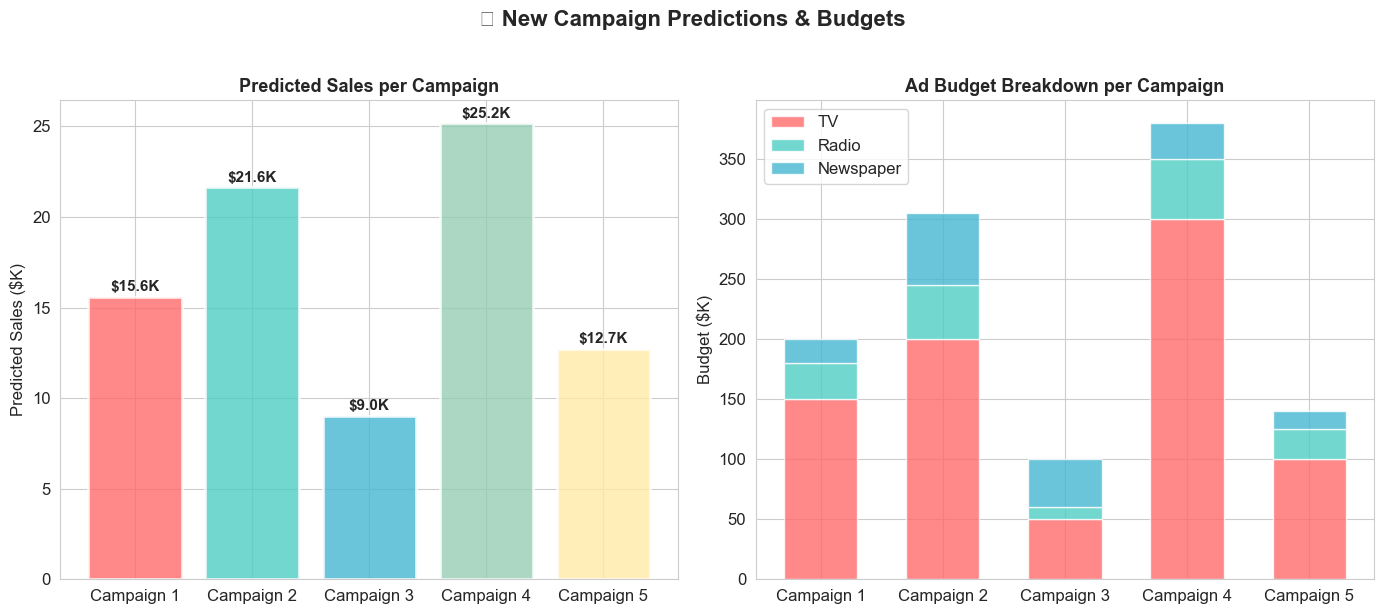

In [22]:
# Visualize predictions
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Predicted Sales
campaigns = [f'Campaign {i+1}' for i in range(len(campaign_results))]
bars = axes[0].bar(campaigns, new_predictions, color=['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4', '#FFEAA7'],
                   edgecolor='white', linewidth=2, alpha=0.8)
for bar, val in zip(bars, new_predictions):
    axes[0].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.3,
                f'${val:.1f}K', ha='center', fontweight='bold', fontsize=11)
axes[0].set_title('Predicted Sales per Campaign', fontweight='bold', fontsize=13)
axes[0].set_ylabel('Predicted Sales ($K)')

# Budget breakdown stacked bar
x = np.arange(len(campaigns))
width = 0.6
axes[1].bar(x, new_campaigns['TV'], width, label='TV', color='#FF6B6B', alpha=0.8)
axes[1].bar(x, new_campaigns['Radio'], width, bottom=new_campaigns['TV'], label='Radio', color='#4ECDC4', alpha=0.8)
axes[1].bar(x, new_campaigns['Newspaper'], width, 
           bottom=new_campaigns['TV'] + new_campaigns['Radio'], label='Newspaper', color='#45B7D1', alpha=0.8)
axes[1].set_xticks(x)
axes[1].set_xticklabels(campaigns)
axes[1].set_title('Ad Budget Breakdown per Campaign', fontweight='bold', fontsize=13)
axes[1].set_ylabel('Budget ($K)')
axes[1].legend()

plt.suptitle('🔮 New Campaign Predictions & Budgets', fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

---
## 9️⃣ Key Findings & Business Insights

### 📊 Data Insights

1. **TV advertising** has the **strongest correlation** with sales (~0.90), making it the most impactful channel
2. **Radio advertising** shows a **moderate positive correlation** (~0.35) with sales
3. **Newspaper advertising** has the **weakest correlation** (~0.16) with sales — least effective individually
4. The **TV × Radio interaction** feature significantly boosts model performance, suggesting a **synergy effect** between TV and Radio advertising

### 🏆 Model Performance

- **Ensemble models** (Random Forest, Gradient Boosting) tend to outperform linear models by capturing non-linear relationships
- **Feature engineering** (interaction terms, budget shares) significantly improved model accuracy
- All models achieved strong R² scores, confirming advertising budgets are powerful predictors of sales

### 💡 Business Recommendations

| Recommendation | Impact |
|---------------|--------|
| **Prioritize TV advertising** — highest ROI and strongest predictor of sales | 🔴 High |
| **Combine TV + Radio** — interaction effect creates amplified returns | 🔴 High |
| **Re-evaluate newspaper spend** — weakest impact; consider reallocating budget | 🟡 Medium |
| **Use the predictive model** to simulate campaign budgets before launch | 🟢 Operational |
| **Optimize total spend allocation** — maximize TV share while maintaining Radio presence | 🔴 High |

---
## 🔚 Conclusion

In this project, we successfully built a **Sales Prediction System** using machine learning in Python. Starting from exploratory data analysis, we identified key patterns in advertising data, engineered powerful interaction features, and trained **6 regression models** to predict sales.

The analysis confirms that **advertising budgets, particularly TV and the TV–Radio synergy**, are the strongest drivers of sales. The best-performing model can help businesses **forecast sales accurately** and make **data-driven decisions** about advertising budget allocation.

---

*📝 Submitted as part of CodSoft Data Science Internship — Task 2*  
*👤 Author: Piyush Ramteke*